In [2]:
import pandas as pd
 
# membaca file iris.csv
iris = pd.read_csv('Iris.csv')

In [3]:
# melihat informasi dataset pada 5 baris pertama
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Melihat informasi dataset
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# menghilangkan kolom yang tidak penting
iris.drop('Id',axis=1,inplace=True)

In [6]:
# memisahkan atribut dan label
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm' ]]
y = iris['Species']

In [7]:
# Membagi dataset menjadi data latih & data uji
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=123)

In [8]:
from sklearn.tree import DecisionTreeClassifier
 
# membuat model Decision Tree
tree_model = DecisionTreeClassifier() 
 
# melakukan pelatihan model terhadap data
tree_model = tree_model.fit(X_train, y_train)

In [9]:
# Evaluasi Model
from sklearn.metrics import accuracy_score

y_pred = tree_model.predict(X_test)

acc_secore = round(accuracy_score(y_pred, y_test), 3)

print('Accuracy: ', acc_secore)


Accuracy:  0.933


In [10]:
# prediksi model dengan tree_model.predict([[SepalLength, SepalWidth, PetalLength, PetalWidth]])
print(tree_model.predict([[6.2, 3.4, 5.4, 2.3]])[0])

Iris-virginica


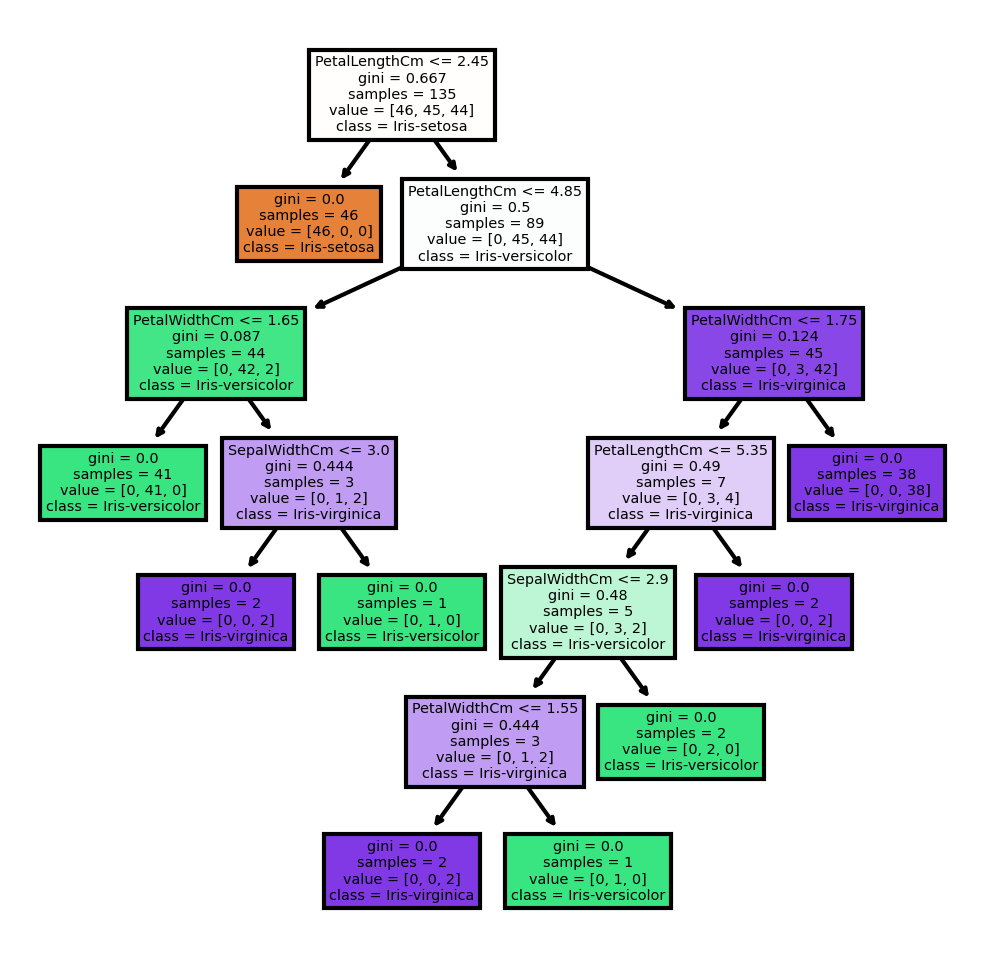

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
fn=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
cn=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(tree_model,
               feature_names = fn, 
               class_names=cn,
               filled = True);
fig.savefig('Iris_Classification_Decission_Tree.png')